In [3]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.10.0
19.24.2


In [4]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


# 1차 배운 과정 그대로 진행
- 스티커 이전까지

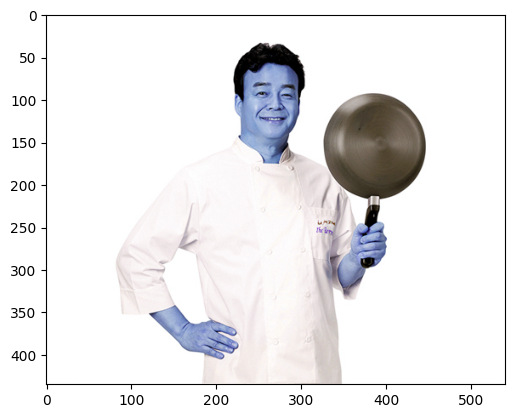

In [5]:
my_image_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/back.png'
if not os.path.exists(my_image_path):
    print(f"File not found: {my_image_path}")
else:
    img_bgr = cv2.imread(my_image_path)
    img_show = img_bgr.copy()
    plt.imshow(img_bgr)
    plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


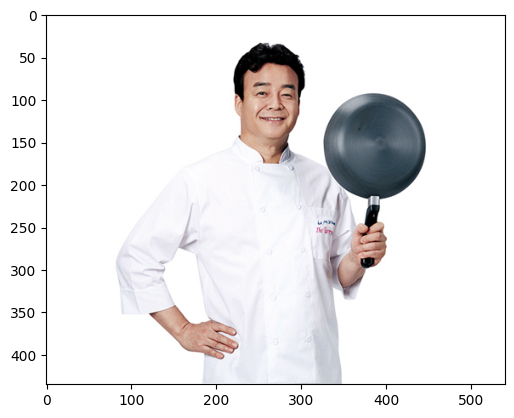

In [6]:

my_image_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/back.png'
img_rgb = cv2.imread(my_image_path)

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


# 얼굴 검출 Face Detection

In [7]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")
"""
dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾습니다.
"""


🌫🛸


'\ndlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾습니다.\n'

In [8]:
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) # dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
"""
detector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다.
이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다.
이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능
"""

🌫🛸


'\ndetector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다. \n이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다. \n이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능\n'

rectangles[[(229, 63) (303, 138)]]


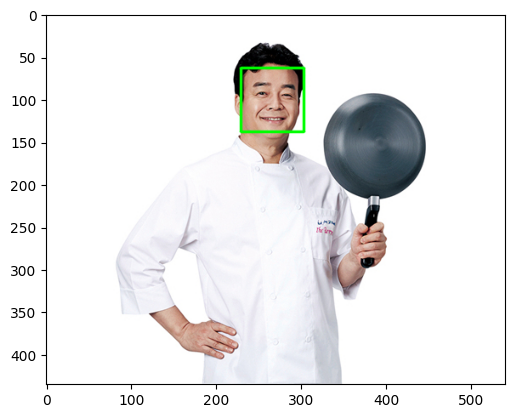

"\ndlib detector 는 dlib.rectangles 타입의 객체를 반환합니다. \ndlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.\nㅁ 'rectangles[[(345, 98) (531, 284)]]'\nleft : 345\ntop : 98\nright : 531\nbottom : 284\n"

In [9]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
"""
dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다.
dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.
ㅁ 'rectangles[[(345, 98) (531, 284)]]'
left : 345
top : 98
right : 531
bottom : 284
"""


# 얼굴 랜드마크 Face landmark

In [9]:
project_path = '/content/drive/My Drive/Colab Notebooks/camera_sticker'

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
model_path = '/content/drive/My Drive/Colab_Notebooks/camera_sticker/models/shape_predictor_68_face_landmarks.dat'    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

Mounted at /content/drive
🌫🛸


In [12]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


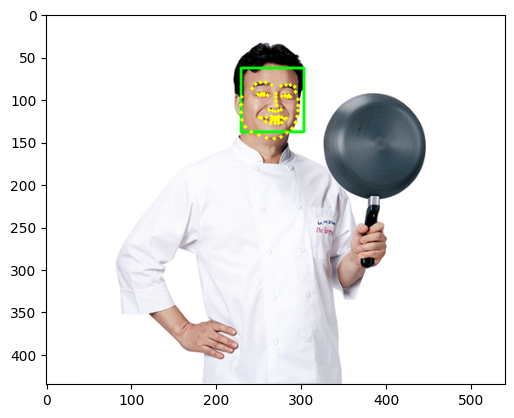

In [13]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [ ]:
# 스티커 위치
# x = x nose, y = y_nose - (height/2) *height = box height
# 사진의 맨 위 y 좌표 값이 0이고 사진의 밑으로 내려갈수록 y 좌표 값이 커지기 때문에, y좌표는코'의 y좌표에서 'height/2' 값을 뺀 값으로 설정

In [14]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(271, 107)
(x,y) : (271,69)
(w,h) : (75,75)


In [ ]:
# 얼굴 이미지에서는 코의 중심점이 (271, 107) 로 나오네요.  # 코의 index는 30 입니다.
# x, y 는 전체 이미지 내에서 코의 위치를 찾은것 -> 여기서, 스티커의 위치가 x, y다.
#	•	코의 y좌표: 107
#	•	얼굴 높이의 절반: 75+1 // 2 = 38
#	•	최종 y값: 107 - 38 = 69
# dlib_rect = rectangles[(x1=271, y1=32, x2=346, y2=107)]라면:
#	•	height = 107 - 32 + 1 = 76

In [22]:
sticker_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/cat-whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 알파 채널 포함, cv2.imread(이미지 경로) → image객체 행렬을 반환


In [23]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(75) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인


(75, 75, 4)


In [24]:
# 고양이 수염이 시작할 위치
add = 5 # 10정도 설정
refined_x = x - w // 2 # 271 - (75//2) = 271-37 = 234
refined_y = y + add # 69 + 5 = 74
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남(아이펠 과정은, -6 나옴)

(x,y) : (234,74)


In [25]:

# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')


(x,y) : (234,74)


In [26]:
# 원본 이미지에서, 스티커가 배치될 영역 슬라이싱
# sticker_area는 원본 이미지 일부!, 스티커 크기와 동일한 영역 나타냄
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]



In [27]:
# png파일, 알파채널을 따로 분리
# 알파값이 0(완전투명), 255(완전불투명)
alpha_channel = img_sticker[:, :, 3]  # 알파 채널 분리
rgb_sticker = img_sticker[:, :, :3]  # RGB 채널 분리

In [28]:
# np.where를 사용해 스티커 합성
sticker_area = np.where(alpha_channel[:, :, None] == 0, sticker_area, rgb_sticker)
"""
	1.	alpha_channel[:, :, None]
	•	알파 채널은 2D 배열 (height, width)로 되어 있으므로, 3D 배열 (height, width, 1)로 확장
	•	이렇게 하면 RGB 데이터 (height, width, 3)와 브로드캐스팅이 가능
	2.	np.where
  알파 채널이 0일시(투명할 경우)
	•	True: sticker_area (원본 이미지 픽셀 값 유지).
	•	False: rgb_sticker (스티커 이미지 픽셀 값 사용).
	3.	결과
	•	np.where는 각 픽셀에 대해 조건을 확인한 뒤, RGB 채널 전체를 한 번에 처리한 결과 배열을 반환
"""


'\n\t1.\talpha_channel[:, :, None]\n\t•\t알파 채널은 2D 배열 (height, width)로 되어 있으므로, 3D 배열 (height, width, 1)로 확장\n\t•\t이렇게 하면 RGB 데이터 (height, width, 3)와 브로드캐스팅이 가능\n\t2.\tnp.where\n  알파 채널이 0일시(투명할 경우)\n\t•\tTrue: sticker_area (원본 이미지 픽셀 값 유지).\n\t•\tFalse: rgb_sticker (스티커 이미지 픽셀 값 사용).\n\t3.\t결과\n\t•\tnp.where는 각 픽셀에 대해 조건을 확인한 뒤, RGB 채널 전체를 한 번에 처리한 결과 배열을 반환\n'

In [29]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area
print("슝~")

슝~


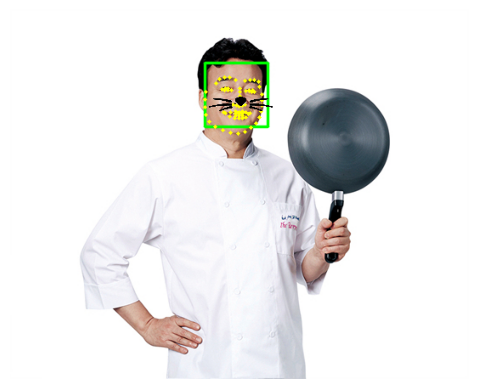

In [30]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- 테스트 완
- add값 5 적절

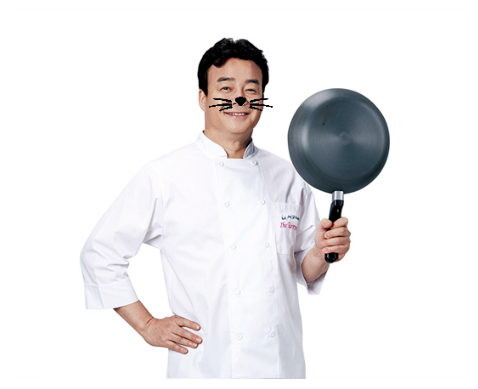

In [31]:
# 위에서 설명했으므로 생략
# 요리사 모자 이미지
# 위 참조 sticker_area = np.where(alpha_channel[:, :, None] == 0, sticker_area, rgb_sticker)

# img_bgr은 rgb로만 적용해놓은 원본 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] # 원본이미지
sticker_area = np.where(alpha_channel[:, :, None] == 0, sticker_area, rgb_sticker) # 투명부분 원본이미지로 덮어쓰는 처리

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 모자 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

# cv2.addWeighted(src1, alpha, src2, beta, gamma) 적용하기
	•	src1: 첫 번째 이미지.
	•	alpha: 첫 번째 이미지의 가중치 - 스티커가 얼마나 뚜렷하게 보일지
	•	src2: 두 번째 이미지.
	•	beta: 두 번째 이미지의 가중치 - 원본 이미지가 얼마나 뚜렷하게 보일지
	•	gamma: 결과 이미지에 추가할 값 (일반적으로 0).

  •	alpha = 1.0, beta = 0.0:
	-> 스티커만 보임 (원본 이미지는 전혀 보이지 않음).  
	•	alpha = 0.0, beta = 1.0:  
	->	원본 이미지만 보임 (스티커는 전혀 보이지 않음).  
	•	alpha = 0.7, beta = 0.3 (일반적):  
	-> 스티커가 뚜렷하면서도 원본 이미지와 자연스럽게 섞임  

In [32]:
# 스티커 합성을 위한 가중치 설정 1차
alpha = 0.7  # 스티커의 투명도
beta = 0.3   # 원본 이미지의 투명도

# addWeighted 원리 활용, 각 이미지에 가중치를 직접 적용하기
# NumPy 브로드캐스팅([:, :, None])을 사용해 RGB 채널을 동시에 처리
sticker_area = (rgb_sticker * alpha[:, :, None] + sticker_area * beta[:, :, None]).astype(np.uint8)

# 원본 이미지에 결과 반영
img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = sticker_area

# 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


""" addWeighted 사용 (RGB채널 각각 처리) 하는 방식도 있음!
for c in range(3):  # RGB 채널 각각 처리
    sticker_area[:, :, c] = cv2.addWeighted(rgb_sticker[:, :, c], alpha, sticker_area[:, :, c], beta, 0)
"""

TypeError: 'float' object is not subscriptable

- 그냥 알파 베타 가중치를 내 마음대로 설정하는게 아님!
- '알파채널'을 기준으로 가중치를 부여해야했음


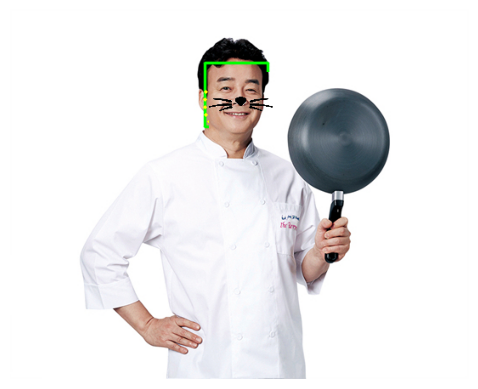

In [33]:
# 1차 수정 3:22
alpha = alpha_channel / 255.0  # 알파 채널을 정규화하여 배열 생성
beta = 1.0 - alpha

# addWeighted 원리 활용, 각 이미지에 가중치를 직접 적용하기
# NumPy 브로드캐스팅([:, :, None])을 사용해 RGB 채널을 동시에 처리
sticker_area = (rgb_sticker * alpha[:, :, None] + sticker_area * beta[:, :, None]).astype(np.uint8)

# 원본 이미지에 결과 반영
img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = sticker_area

# 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### addWeighted 사용 (RGB채널 각각 처리) 하는 방식으로도 해보기

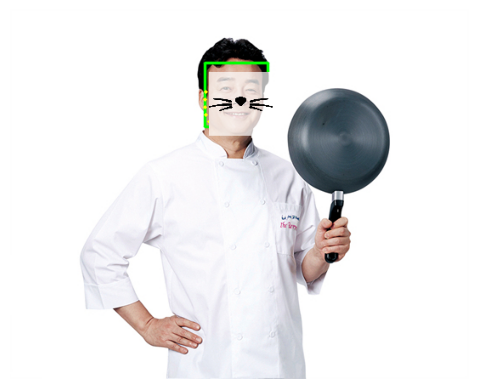

In [36]:
alpha = 0.7  # 스티커의 투명도
beta = 0.3   # 원본 이미지의 투명도

for c in range(3):  # RGB 채널 각각 처리
    sticker_area[:, :, c] = cv2.addWeighted(rgb_sticker[:, :, c], alpha, sticker_area[:, :, c], beta, 0)

img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = sticker_area

# 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [37]:
# 알파 채널 정규화 (0~1)
alpha = alpha_channel / 255.0
beta = 1.0 - alpha


for c in range(3):  # RGB 채널 각각 처리
    sticker_area[:, :, c] = cv2.addWeighted(rgb_sticker[:, :, c], alpha, sticker_area[:, :, c], beta, 0)

img_show[refined_y:refined_y+sticker_height, refined_x:refined_x+sticker_width] = sticker_area

# 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'addWeighted'
> Overload resolution failed:
>  - Argument 'alpha' can not be treated as a double
>  - Argument 'alpha' can not be treated as a double


- 오류 원인 파악 및 공부
	cv2.addWeighted 에러 원인  
	alpha와 beta에 배열을 전달, 이 함수는 픽셀별 가중치를 처리하지 못함
  cv2.addWeighted는 이미지 단위로 계산하며, 내부적으로 모든 픽셀에 동일한 alpha와 beta 값을 적용함
  	•	alpha_channel / 255.0은 2D 배열(픽셀 단위로 값이 다른 가중치 배열).
	•	cv2.addWeighted는 스칼라 값(단일 숫자)만 허용하므로, 배열 형태로 전달하면 에러가 발생

	해결 방법은?  
	배열 기반의 동적 가중치 처리는 NumPy를 사용해야 함  
	OpenCV 함수는 단일 값(스칼라)만 허용


# 얼굴 각도 변형

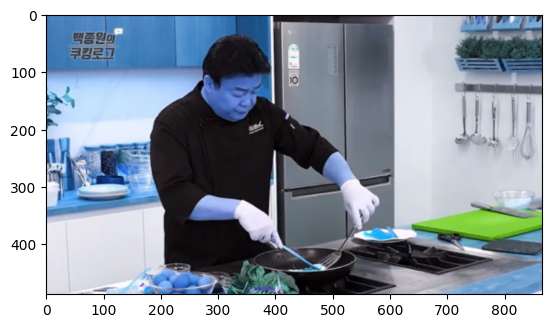

In [38]:
my_image_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/back2_rotation.png'
if not os.path.exists(my_image_path):
    print(f"File not found: {my_image_path}")
else:
    img_bgr = cv2.imread(my_image_path)
    img_show = img_bgr.copy()
    plt.imshow(img_bgr)
    plt.show()

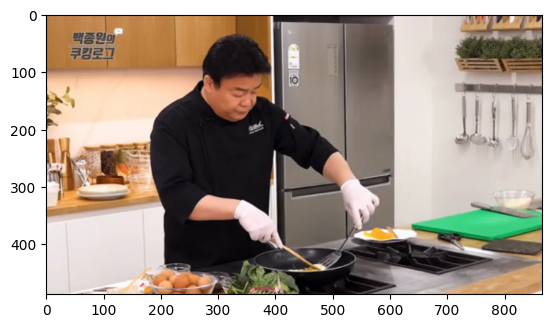

In [39]:
img_rgb = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


In [40]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [41]:
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) # dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[]


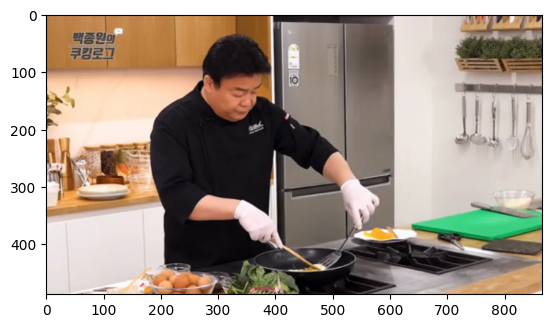

In [42]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 아래를 내려다보고 있으면 찾지 못하는걸까?

## 다른각도 사진

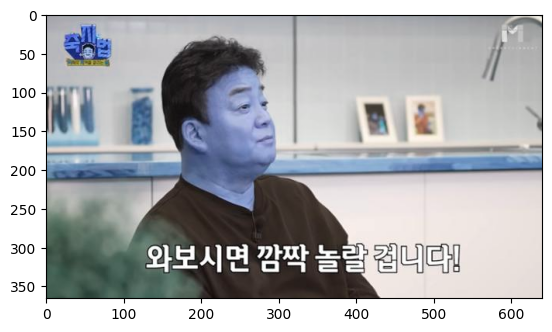

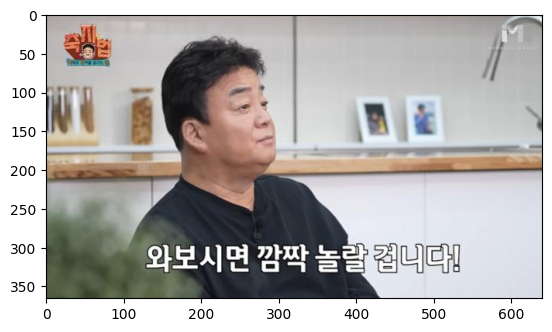

In [81]:
# 다른 각도 사진
my_image_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/back_rotation2.png'
if not os.path.exists(my_image_path):
    print(f"File not found: {my_image_path}")
else:
    img_bgr = cv2.imread(my_image_path)
    img_show = img_bgr.copy()
    plt.imshow(img_bgr)
    plt.show()

img_rgb = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


rectangles[[(211, 80) (318, 187)]]


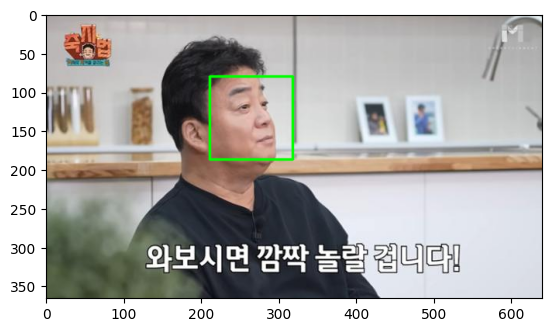

In [82]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) # dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 위와 같은 각도는 찾을 수 있게됨

68


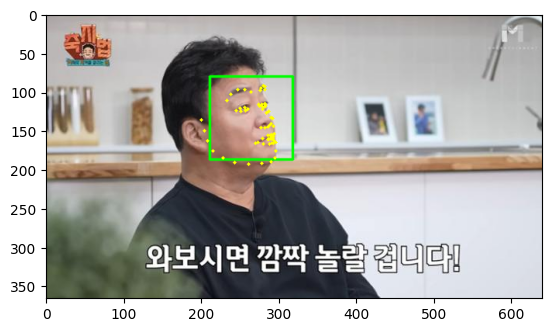

In [83]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [84]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(290, 133)
(x,y) : (290,79)
(w,h) : (108,108)


In [85]:
sticker_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/cat-whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 알파 채널 포함, cv2.imread(이미지 경로) → image객체 행렬을 반환


In [86]:
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(75) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인



(108, 108, 4)


In [87]:
# 고양이 수염이 시작할 위치
add = 5 # 10정도 설정
refined_x = x - w // 2 # 271 - (75//2) = 271-37 = 234
refined_y = y + add # 69 + 5 = 74
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남(아이펠 과정은, -6 나옴)

(x,y) : (236,84)


In [88]:

# 스티커 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 스티커 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 스티커 이미지를 씌우기 위해 스티커 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')


(x,y) : (236,84)


In [89]:
img_with_sticker = img_show.copy()  # 수정 작업을 위한 복사본

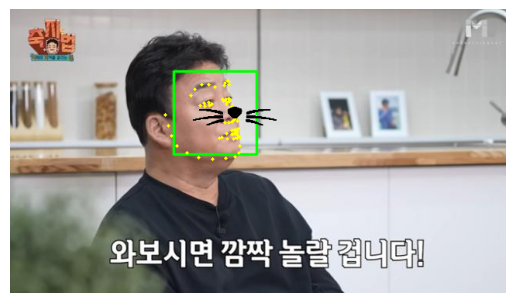

In [90]:
# 원본 이미지에서, 스티커가 배치될 영역 슬라이싱
# sticker_area는 원본 이미지 일부!, 스티커 크기와 동일한 영역 나타냄
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# png파일, 알파채널을 따로 분리
# 알파값이 0(완전투명), 255(완전불투명)
alpha_channel = img_sticker[:, :, 3]  # 알파 채널 분리
rgb_sticker = img_sticker[:, :, :3]  # RGB 채널 분리

# np.where를 사용해 스티커 합성
sticker_area = np.where(alpha_channel[:, :, None] == 0, sticker_area, rgb_sticker)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# 스티커 회전 2D
def rotate_sticker(img, angle):
    """ 스티커 이미지를 주어진 각도만큼 회전
    Args:
        img (numpy.ndarray): 스티커 이미지 (H, W, 4) - 알파 채널 포함
        angle (float): 회전 각도 (도 단위) """

    # 이미지 크기와 중심점 계산
    (h, w) = img.shape[:2]  # 높이와 너비
    center = (w // 2, h // 2)  # 이미지의 중심점

    # 회전 변환 행렬 생성
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # 회전 적용 (알파 채널 유지)
    rotated = cv2.warpAffine(
        img,
        rotation_matrix,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0, 0)  # 알파 채널 포함하여 투명 배경 유지
    )
    return rotated



In [52]:
# 스티커 회전 3D (테스트 _ 적용 시켜볼 것) : 수평 축을 기준으로 뒤로 기울이는 효과를 내기 위해, 투시 변환(Perspective Transform) 행렬을 생성
def horizontal_rotation(img, angle):
    """수평 축 기준으로 이미지를 회전
    Args:
        img (numpy.ndarray): 입력 이미지
        angle (float): 회전 각도 (양수: 뒤로 기울임, 음수: 앞으로 기울임)"""

    (h, w) = img.shape[:2]

    # 회전 각도를 라디안으로 변환
    theta = np.radians(angle)

    # 수평 축을 기준으로 Y 좌표 변형 계산
    d = h / 2.0  # 중심에서의 거리
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # 변환 후 이미지의 4개의 코너 좌표 계산
    src_points = np.array([
        [0, 0],       # 좌상단
        [w - 1, 0],   # 우상단
        [w - 1, h - 1],  # 우하단
        [0, h - 1]    # 좌하단
    ], dtype="float32")

    dst_points = np.array([
        [0, d * (1 - cos_theta)],                  # 좌상단
        [w - 1, d * (1 - cos_theta)],              # 우상단
        [w - 1, h - d * (1 - cos_theta) - 1],      # 우하단
        [0, h - d * (1 - cos_theta) - 1]           # 좌하단
    ], dtype="float32")

    # 투시 변환 행렬 계산
    perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # 이미지에 투시 변환 적용
    rotated = cv2.warpPerspective(
        img,
        perspective_matrix,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0, 0)  # 투명 배경 유지
    )
    return rotated

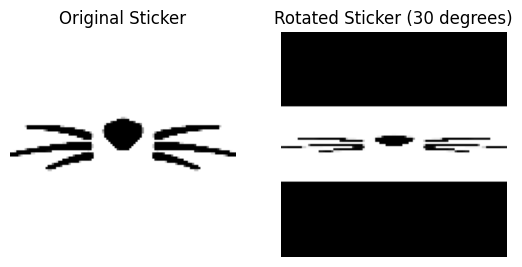

In [56]:
# 수평 회전 적용 (예: 50도 뒤로 회전)
rotated_sticker = horizontal_rotation(img_sticker, angle=70)

# 결과 시각화
plt.subplot(1, 2, 1)
plt.title("Original Sticker")
plt.imshow(cv2.cvtColor(img_sticker[:, :, :3], cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Rotated Sticker (30 degrees)")
plt.imshow(cv2.cvtColor(rotated_sticker[:, :, :3], cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


# np.where를 사용해 스티커 합성
# sticker_area = np.where(alpha_channel[:, :, None] == 0, sticker_area, rgb_sticker)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area
# plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

### 수직축 기준 회전 적용(실제 이미지에 적용해볼 것)

In [91]:
# 수직축 기준 회전(실제 우리 이미지에 적용해볼것)
def vertical_rotation(img, angle):
    """
    수직 축 기준으로 이미지를 회전시킵니다.
    Args:
        img (numpy.ndarray): 입력 이미지
        angle (float): 회전 각도 (양수: 오른쪽 뒤로, 음수: 왼쪽 뒤로)
    """
    (h, w) = img.shape[:2]

    # 회전 각도를 라디안으로 변환
    theta = np.radians(angle)

    # 수직 축을 기준으로 X 좌표 변형 계산
    d = w / 1.5  # 중심에서의 거리
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # 변환 후 이미지의 4개의 코너 좌표 계산
    src_points = np.array([
        [0, 0],       # 좌상단
        [w - 1, 0],   # 우상단
        [w - 1, h - 1],  # 우하단
        [0, h - 1]    # 좌하단
    ], dtype="float32")

    #2차 변형(우측만 좀더 회전이 되게끔)
    # 변환 후 좌표 (좌측은 적게, 우측은 많이 이동)
    dst_points = np.array([
        [d * (1 - cos_theta) * 0.8, 0],                # 좌상단
        [w - d * (1 - cos_theta) - 1, 0],              # 우상단
        [w - d * (1 - cos_theta) - 1, h - 1],          # 우하단
        [d * (1 - cos_theta) * 0.8, h - 1]             # 좌하단
    ], dtype="float32")

    # 투시 변환 행렬 계산
    perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # 이미지에 투시 변환 적용
    rotated = cv2.warpPerspective(
        img,
        perspective_matrix,
        (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0, 0)  # 투명 배경 유지
    )
    return rotated


""" 기본 rotation(좌,우 동일하게 rotation)
    dst_points = np.array([
        [d * (1 - cos_theta), 0],                # 좌상단
        [w - d * (1 - cos_theta) - 1, 0],        # 우상단
        [w - d * (1 - cos_theta) - 1, h - 1],    # 우하단
        [d * (1 - cos_theta), h - 1]             # 좌하단
    ], dtype="float32")
"""





' 기본 rotation(좌,우 동일하게 rotation)\n    dst_points = np.array([\n        [d * (1 - cos_theta), 0],                # 좌상단\n        [w - d * (1 - cos_theta) - 1, 0],        # 우상단\n        [w - d * (1 - cos_theta) - 1, h - 1],    # 우하단\n        [d * (1 - cos_theta), h - 1]             # 좌하단\n    ], dtype="float32")\n'

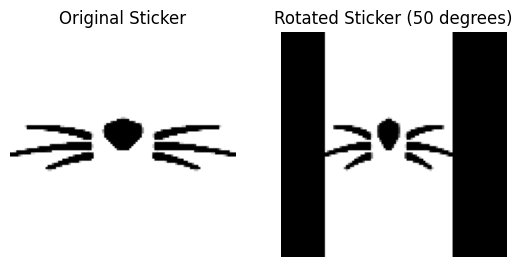

In [98]:
rotated_sticker = vertical_rotation(img_sticker, angle=50)

# 결과 시각화
plt.subplot(1, 2, 1)
plt.title("Original Sticker")
plt.imshow(cv2.cvtColor(img_sticker[:, :, :3], cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Rotated Sticker (50 degrees)")
plt.imshow(cv2.cvtColor(rotated_sticker[:, :, :3], cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [93]:
rotated_sticker = cv2.resize(rotated_sticker, (98,98)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(75) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (rotated_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인


(98, 98, 4)


In [94]:
# 고양이 수염이 시작할 위치
add = 5 # 10정도 설정
refined_x = x - w // 2 # 271 - (75//2) = 271-37 = 234
refined_y = y + add # 69 + 5 = 74
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남(아이펠 과정은, -6 나옴)


(x,y) : (236,84)


In [95]:
if refined_x < 0:
    rotated_sticker = rotated_sticker[:, -refined_x:]
    refined_x = 0
# 스티커 이미지를 씌우기 위해 스티커 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    rotated_sticker = rotated_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (236,84)


In [96]:
sticker_area = img_with_sticker[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]


In [61]:
# img_with_sticker = img_show.copy()  # 수정 작업을 위한 복사본

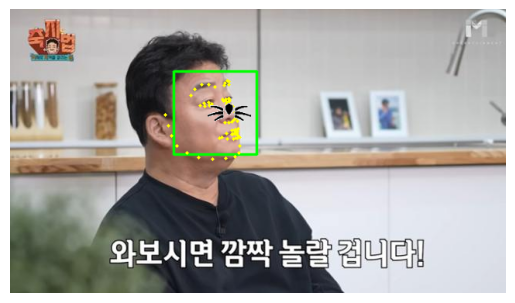

In [97]:
alpha_channel = rotated_sticker[:, :, 3]  # 알파 채널 분리
rgb_sticker = rotated_sticker[:, :, :3]  # RGB 채널 분리

# np.where를 사용해 스티커 합성
sticker_area = np.where(alpha_channel[:, :, None] == 0, sticker_area, rgb_sticker)
img_with_sticker[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = sticker_area
plt.close()  # 기존 Figure 닫기
plt.figure()  # 새로운 Figure 생성
plt.imshow(cv2.cvtColor(img_with_sticker, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- 로테이션 적용시킨것이 왜 안될까..?
- 3차수정 : 수정 완
하지만, 내가 원하는 이미지로 출력되진 않음(좀더 우측 이미지는 짧게 나오길 바랐음)  
이유가 뭘까? 애초에 2D이미지라 그런걸지,,,

# 원본 이미지를 회전해볼 경우 (누워있는 듯)

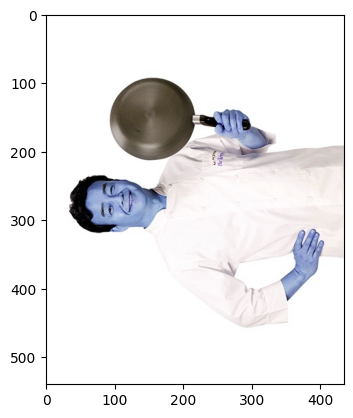

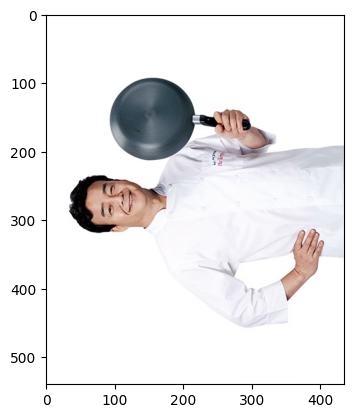

In [70]:
# 다른 각도 사진
my_image_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/back_origin_rot.png'
if not os.path.exists(my_image_path):
    print(f"File not found: {my_image_path}")
else:
    img_bgr = cv2.imread(my_image_path)
    img_show = img_bgr.copy()
    plt.imshow(img_bgr)
    plt.show()

img_rgb = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


rectangles[]


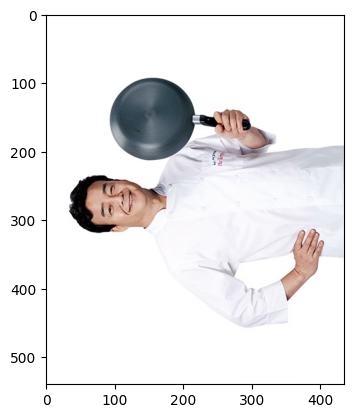

In [71]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) # dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 얼굴을 detection하지 못함. 바운딩 박스 그리지 못함

# 누워있는 옆모습 촬영시

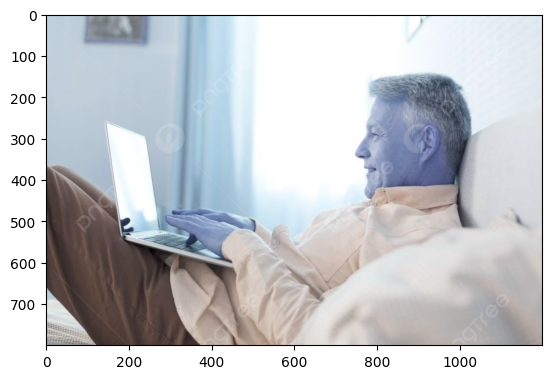

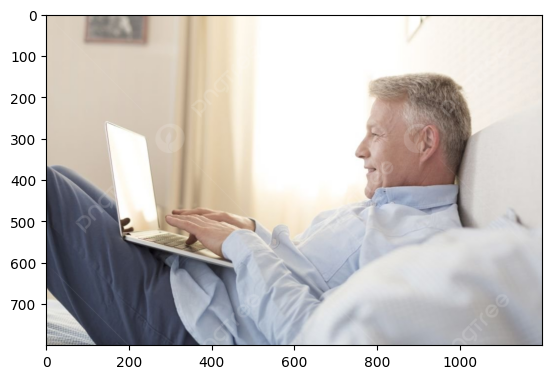

In [68]:
# 다른 각도 사진
my_image_path = '/content/drive/MyDrive/Colab_Notebooks/camera_sticker/images/person_laying2.png'
if not os.path.exists(my_image_path):
    print(f"File not found: {my_image_path}")
else:
    img_bgr = cv2.imread(my_image_path)
    img_show = img_bgr.copy()
    plt.imshow(img_bgr)
    plt.show()

img_rgb = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력


rectangles[]


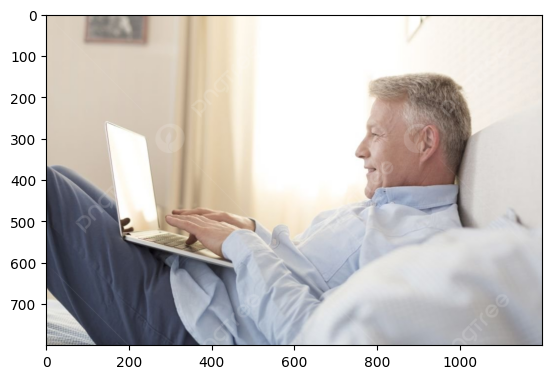

In [69]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) # dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 얼굴을 detection하지 못함. 바운딩 박스 그리지 못함

# 최종 회고

1. 알파채널에 대한 개념을 좀더 깊이있게 공부해야할 것 같다
프로젝트 전, 왕관 파일이 아닌 요리사 모자 파일을 바탕으로 이미지를 씌우려는 시도를 해보았습니다.  
하지만 실습과정에서는 알파채널에 대한 값을 무시한 채 read하는 과정이 있어, 모자의 여백인 하얀색 바탕이 그대로 머리 위에 얹히게 되는 문제가 발생하였습니다.  
png파일을 불러들일 땐 위와같은 문제를 고려하면서 이미지 작업을 처리해야함을 깨닫게 되었습니다.

2. 정면을 바라보는 얼굴을 기준으로 rotation만 했음에도 불구하고 face detection이 되지 않음을 발견했스니다.     
3. 추가로 옆을 바라보는(180도) 모습또한 detection이 안됨을 발견했습니다.  
4. 반면 고개를 조금 돌리는 모습에 대해서는 detection이 되는 것을 보았고, 고개를 일부 숙이는 과정에서는 탐지가 안됨을 발견했습니다.  

-> face detector의 원리와 연관이 있다고 생각합니다.
=> 위 탐지기는 애초에 정면얼굴 탐지를 목적으로 설계되어있기에, 탐지 성능이 떨어져 detection을 못한다고 생각합니다.

5. 추가적으로 스티커를 Rotation하는 부분은 더 공부가 필요할 것 같습니다